In [290]:
import pandas as pd
import numpy as np

In [291]:
sismos_eeuu= pd.read_csv('datasets/Datos_USA.csv')

In [292]:
sismos_eeuu.head()

,id,Magnitud,primer reg,Ult reg,properties.felt,cdi,mmi,Posivilidad tsunami,Importancia del evento,net,ids,nst,Dist Horizontal epicentro,Brecha azimutal,estado,Longitud,Latitud,Profundidad
0,us6000kbl9,2.50,2023-05-13 00:22:34.350,2023-05-13 01:02:32.040,NaN,NaN,NaN,0,96,us,",us6000kbl9,",10.0,0.46000,119.00,Kansas,-99.499500,39.235400,3.69
1,nn00859459,2.80,2023-05-12 22:29:14.464,2023-05-12 23:43:48.040,NaN,NaN,NaN,0,121,nn,",us6000kbkj,nn00859459,",14.0,0.22000,64.37,Nevada,-118.914500,38.402200,11.50
2,nc73887311,2.91,2023-05-12 20:57:31.130,2023-05-12 23:55:14.063,NaN,NaN,NaN,0,130,nc,",nc73887311,us6000kbjl,",24.0,0.10920,182.00,CA,-121.261330,35.747665,3.66
3,nc73887306,2.90,2023-05-12 20:57:24.320,2023-05-12 23:54:10.059,NaN,NaN,NaN,0,129,nc,",nc73887306,",12.0,0.10120,180.00,CA,-121.248833,35.747501,4.59
4,ci40223751,2.77,2023-05-12 17:30:47.620,2023-05-12 23:47:37.500,NaN,NaN,NaN,0,118,ci,",ci40223751,us6000kbhy,",94.0,0.07689,20.00,CA,-116.735167,33.979167,17.35


In [293]:
sismos_eeuu.info

<bound method DataFrame.info of                id  Magnitud               primer reg                  Ult reg  \
0      us6000kbl9      2.50  2023-05-13 00:22:34.350  2023-05-13 01:02:32.040   
1      nn00859459      2.80  2023-05-12 22:29:14.464  2023-05-12 23:43:48.040   
2      nc73887311      2.91  2023-05-12 20:57:31.130  2023-05-12 23:55:14.063   
3      nc73887306      2.90  2023-05-12 20:57:24.320  2023-05-12 23:54:10.059   
4      ci40223751      2.77  2023-05-12 17:30:47.620  2023-05-12 23:47:37.500   
...           ...       ...                      ...                      ...   
19995  nc72885755      2.50  2017-09-05 20:02:09.360  2017-12-27 06:54:44.502   
19996  us2000ag9h      2.50  2017-09-05 19:23:59.900  2017-12-07 20:00:14.040   
19997  uw61303577      2.82  2017-09-05 15:48:09.530  2017-12-07 20:00:13.040   
19998  us2000ag3c      2.70  2017-09-05 14:46:41.690  2017-12-07 20:00:13.040   
19999  us2000ag1p      2.90  2017-09-05 11:38:20.480  2017-12-07 20:00:13.040

In [294]:
# Asignar valores a la columna "clasifica_profundidad" utilizando np.where
sismos_eeuu['clasifica_profundidad'] = np.where(sismos_eeuu['Profundidad'] <= 70, 2,
                                                np.where((sismos_eeuu['Profundidad'] > 70) & (sismos_eeuu['Profundidad'] <= 300), 1, 
                                                         0))

In [295]:
sismos_eeuu = sismos_eeuu.loc[:, ['Magnitud', 'Longitud', 'Latitud', 'Profundidad', 'clasifica_profundidad']]

In [296]:
sismos_eeuu.head()

,Magnitud,Longitud,Latitud,Profundidad,clasifica_profundidad
0,2.50,-99.499500,39.235400,3.69,2
1,2.80,-118.914500,38.402200,11.50,2
2,2.91,-121.261330,35.747665,3.66,2
3,2.90,-121.248833,35.747501,4.59,2
4,2.77,-116.735167,33.979167,17.35,2


In [297]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


# Scikit-learn proporciona una variedad de algoritmos de clustering para analizar y agrupar datos. En particular, KMeans es un algoritmo de 
#clustering muy utilizado que agrupa los datos en k grupos (donde k es un número predefinido) según la similitud entre ellos. 
#El objetivo de este algoritmo es minimizar la suma de las distancias al cuadrado entre cada punto y su centroide correspondiente.

#Matplotlib.pyplot proporciona herramientas para crear gráficos y visualizaciones en Python. Esta librería es muy útil para visualizar los 
#resultados de los análisis de datos, como los resultados de los algoritmos de clustering. Ofrece una amplia variedad de opciones de visualización, 
#incluyendo gráficos de líneas, de barras, de dispersión, entre otros.

In [298]:
max_magnitud = sismos_eeuu['Magnitud'].max()
min_magnitud = sismos_eeuu['Magnitud'].min()

In [299]:
print(max_magnitud)

7.1


In [300]:
print(min_magnitud)

2.5


In [301]:
Escala_Mercalli = [
    (sismos_eeuu['Magnitud'] >= 6.0),
    (sismos_eeuu['Magnitud'] >= 5)  & (sismos_eeuu['Magnitud'] <6.0),
    (sismos_eeuu['Magnitud'] >= 4)  & (sismos_eeuu['Magnitud'] <5.0),
    (sismos_eeuu['Magnitud'] >= 3) & (sismos_eeuu['Magnitud'] <4),
    (sismos_eeuu['Magnitud'] > 0.5) & (sismos_eeuu['Magnitud'] <3),
    (sismos_eeuu['Magnitud'] <= 0.5)]
peligrosidad = [5, 4, 3, 2, 1, 0]                        
                                                      
sismos_eeuu['Peligrosidad'] = np.select(Escala_Mercalli, peligrosidad, default='Not Specified')

In [302]:
sismos_eeuu.sample(10)

,Magnitud,Longitud,Latitud,Profundidad,clasifica_profundidad,Peligrosidad
14880,2.91,-117.719167,35.922500,3.150,2,1
12979,2.66,-117.535833,35.680667,5.830,2,1
4705,3.10,-109.480700,42.950000,5.000,2,2
12027,3.19,-117.549000,32.943500,15.110,2,2
19239,2.92,-118.803167,38.050000,0.990,2,1
15694,2.58,-113.511833,36.974333,7.680,2,1
1637,2.80,-106.997600,41.298400,9.336,2,1
5651,4.29,-115.615500,33.145000,3.690,2,3
13874,2.70,-117.846000,36.023833,2.900,2,1
7990,2.62,-121.869833,37.514000,9.310,2,1


In [303]:
sismos_eeuu[sismos_eeuu['Magnitud'] > 5.5]  #Para chequear que se haya agregado correctamente, ya que con en el head solo me salian registros 
#con magnitudes peuqeñas

,Magnitud,Longitud,Latitud,Profundidad,clasifica_profundidad,Peligrosidad
1027,6.40,-124.423000,40.525000,17.91,2,5
1239,6.20,-116.390700,30.793600,10.00,2,5
1381,6.10,-112.310600,28.157300,10.00,2,5
3719,6.20,-124.298000,40.390167,27.04,2,5
3720,5.65,-124.626000,40.297833,16.51,2,4
5300,6.00,-119.499833,38.507500,7.45,2,5
8957,5.80,-117.975167,36.446833,4.66,2,4
9290,5.51,-117.428167,35.614833,8.44,2,4
10258,6.50,-117.849700,38.168900,2.70,2,5
11179,6.50,-115.117500,44.464600,12.06,2,5


In [304]:
nan_count = sismos_eeuu.isna().sum().sum()
print("Valores NaN en DataFrame original:", nan_count)

Valores NaN en DataFrame original: 0


In [305]:
#Tomamos una muestra aleatoria de 12000 registros para entrenar

muestra_1=sismos_eeuu.sample(n=12000, random_state=10)

In [306]:
#Tomamos los resgistros sobrantes para predecir (8000)

muestra_2=sismos_eeuu.drop(muestra_1.index)

In [307]:
muestra_2.head()

,Magnitud,Longitud,Latitud,Profundidad,clasifica_profundidad,Peligrosidad
1,2.80,-118.914500,38.402200,11.50,2,1
2,2.91,-121.261330,35.747665,3.66,2,1
3,2.90,-121.248833,35.747501,4.59,2,1
4,2.77,-116.735167,33.979167,17.35,2,1
6,3.06,-121.114670,40.198002,-1.39,2,2


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_500\2093207693.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacion = muestra_1.corr()


[Text(0.5, 0, 'Magnitud'),
 Text(1.5, 0, 'Longitud'),
 Text(2.5, 0, 'Latitud'),
 Text(3.5, 0, 'Profundidad'),
 Text(4.5, 0, 'clasifica_profundidad')]

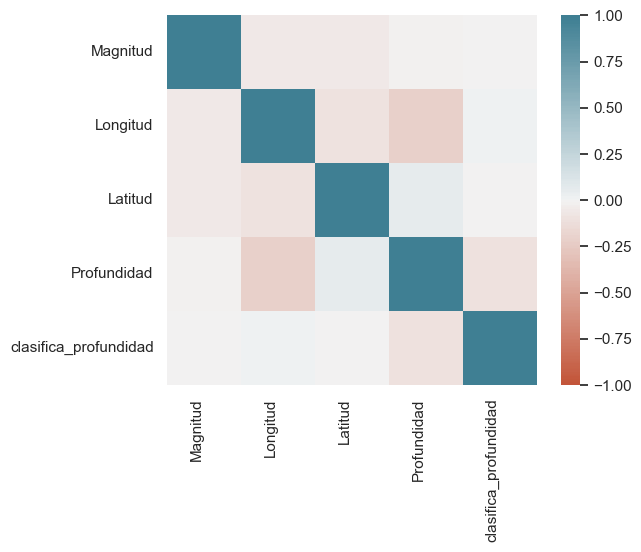

In [308]:
#creamos la matriz de correlacion
matriz_correlacion = muestra_1.corr()
ax = sns.heatmap(
    matriz_correlacion, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)

Escalamos datos para comparar la influencia de cada variable de manera más justa, teniendo en cuenta su importancia relativa

In [309]:
x1 = muestra_1.values 
scaler1 = preprocessing.MinMaxScaler()
x1_scaled = scaler1.fit_transform(x1)
X1_norm = pd.DataFrame(x1_scaled)

In [310]:
X1_norm

,0,1,2,3,4,5
0,0.086957,0.228562,0.705837,0.135626,1.0,0.00
1,0.065217,0.346885,0.274389,0.139690,1.0,0.00
2,0.108696,0.118050,0.531333,0.125966,1.0,0.25
3,0.021739,0.165684,0.774234,0.173622,1.0,0.00
4,0.391304,0.353391,0.271056,0.158233,1.0,0.50
...,...,...,...,...,...,...
11995,0.043478,0.456596,0.338887,0.044822,1.0,0.00
11996,0.023913,0.119713,0.453360,0.068779,1.0,0.00
11997,0.152174,0.330633,0.755758,0.044822,1.0,0.25
11998,0.043478,0.344837,0.276325,0.100618,1.0,0.00


In [311]:
x2 = muestra_2.values 
scaler2 = preprocessing.MinMaxScaler()
x2_scaled = scaler2.fit_transform(x2)
X2_norm = pd.DataFrame(x2_scaled)

In [312]:
X2_norm

,0,1,2,3,4,5
0,0.0750,0.102440,0.541095,0.208677,0.0,0.00
1,0.1025,0.062902,0.435871,0.098950,0.0,0.00
2,0.1000,0.063113,0.435864,0.111966,0.0,0.00
3,0.0675,0.139156,0.365768,0.290553,0.0,0.00
4,0.1400,0.065373,0.612280,0.028272,0.0,0.25
...,...,...,...,...,...,...
7995,0.0000,0.037614,0.556427,0.067460,0.0,0.00
7996,0.1000,0.228650,0.706625,0.224213,0.0,0.00
7997,0.0000,0.053558,0.502227,0.088453,0.0,0.00
7998,0.0800,0.009656,0.776539,0.407698,0.0,0.00


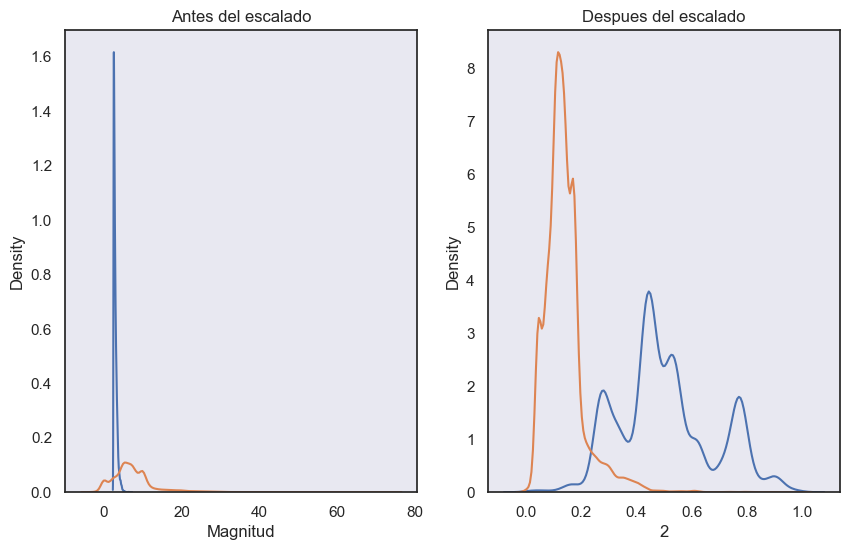

In [313]:
#Graficos de las distribuciones de densidad de probabilidad (KDE, Kernel Density Estimation) de las columnas "Magnitud" y "Profundidad"
#antes y despues del escalado de datos.
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 6))

ax1.set_facecolor('#E8E8F1')
ax2.set_facecolor('#E8E8F1')

ax1.set_title('Antes del escalado')
sns.kdeplot(sismos_eeuu['Magnitud'], ax=ax1)
sns.kdeplot(sismos_eeuu['Profundidad'], ax=ax1)

ax2.set_title('Despues del escalado')
sns.kdeplot(X_norm[2], ax=ax2)
sns.kdeplot(X_norm[3], ax=ax2)

plt.show()

In [314]:
#Generamos los PCA para reducir la dimensionalidad de un conjunto de datos.
#(La idea principal detrás del PCA es encontrar las características principales o los componentes principales que resuman la mayor cantidad 
#de variabilidad en los datos originales. Los componentes principales son combinaciones lineales de las características originales del conjunto 
#de datos.)

pca1 = PCA(n_components = 2) # 2D PCA for the plot
reduced1 = pd.DataFrame(pca1.fit_transform(X1_norm))

In [315]:
reduced1

,0,1
0,-0.196579,-0.050237
1,0.238474,-0.147491
2,-0.024389,0.150574
3,-0.288692,-0.066287
4,0.358400,0.435641
...,...,...
11995,0.213734,-0.160950
11996,0.003028,-0.113113
11997,-0.160984,0.186492
11998,0.235729,-0.158447


In [316]:
pca2 = PCA(n_components = 2) # 2D PCA for the plot
reduced2 = pd.DataFrame(pca2.fit_transform(X2_norm))

In [317]:
reduced2

,0,1
0,-0.104325,-0.061826
1,-0.011224,-0.070542
2,-0.012642,-0.071879
3,0.054950,-0.120083
4,-0.090676,0.188151
...,...,...
7995,-0.143706,-0.091769
7996,-0.203430,-0.020486
7997,-0.092112,-0.109203
7998,-0.357965,0.023193


In [318]:
#análisis de clustering utilizando el algoritmo de KMeans de la librería sklearn.

#especificamos numeros de clusters
kmeans = KMeans(n_clusters=6, n_init=10)
# entrenamos
kmeans = kmeans.fit(reduced1)
# predecimos
labels = kmeans.predict(reduced2)
# verificamos centroides
centroid = kmeans.cluster_centers_
# guardamos una lista con los clusters
clusters = kmeans.labels_.tolist()

In [319]:
#Ahora vamos a seguir trabjaando con el dataframe reduced creado anteriormente, pero le tengo que añadir algunosdatos del sismos_eeuu

lista_peligrosidad1= muestra_1.Peligrosidad.tolist()

In [320]:
lista_peligrosidad2= muestra_2.Peligrosidad.tolist()

In [321]:
reduced1['Cluster'] = clusters
reduced1['Peligrosidad'] = lista_peligrosidad1
reduced1.columns = ['A','B','Cluster', 'Peligrosidad']
reduced1

,A,B,Cluster,Peligrosidad
0,-0.196579,-0.050237,3,1
1,0.238474,-0.147491,2,1
2,-0.024389,0.150574,1,2
3,-0.288692,-0.066287,3,1
4,0.358400,0.435641,6,3
...,...,...,...,...
11995,0.213734,-0.160950,2,1
11996,0.003028,-0.113113,0,1
11997,-0.160984,0.186492,4,2
11998,0.235729,-0.158447,2,1


In [322]:
#vamos a ver cuantos objetos con características similares hay por cada grupo, para eso agrupamos por Cluster
print(reduced1.groupby('Cluster').size())

Cluster
0    3487
1    1598
2    2548
3    1847
4    1149
5     992
6     379
dtype: int64


In [323]:
#Vamos a ver en nuestra clasificacion de peligrosidad si se parece en algo
print(reduced1.groupby('Peligrosidad').size())

Peligrosidad
1    7882
2    3718
3     368
4      25
5       7
dtype: int64


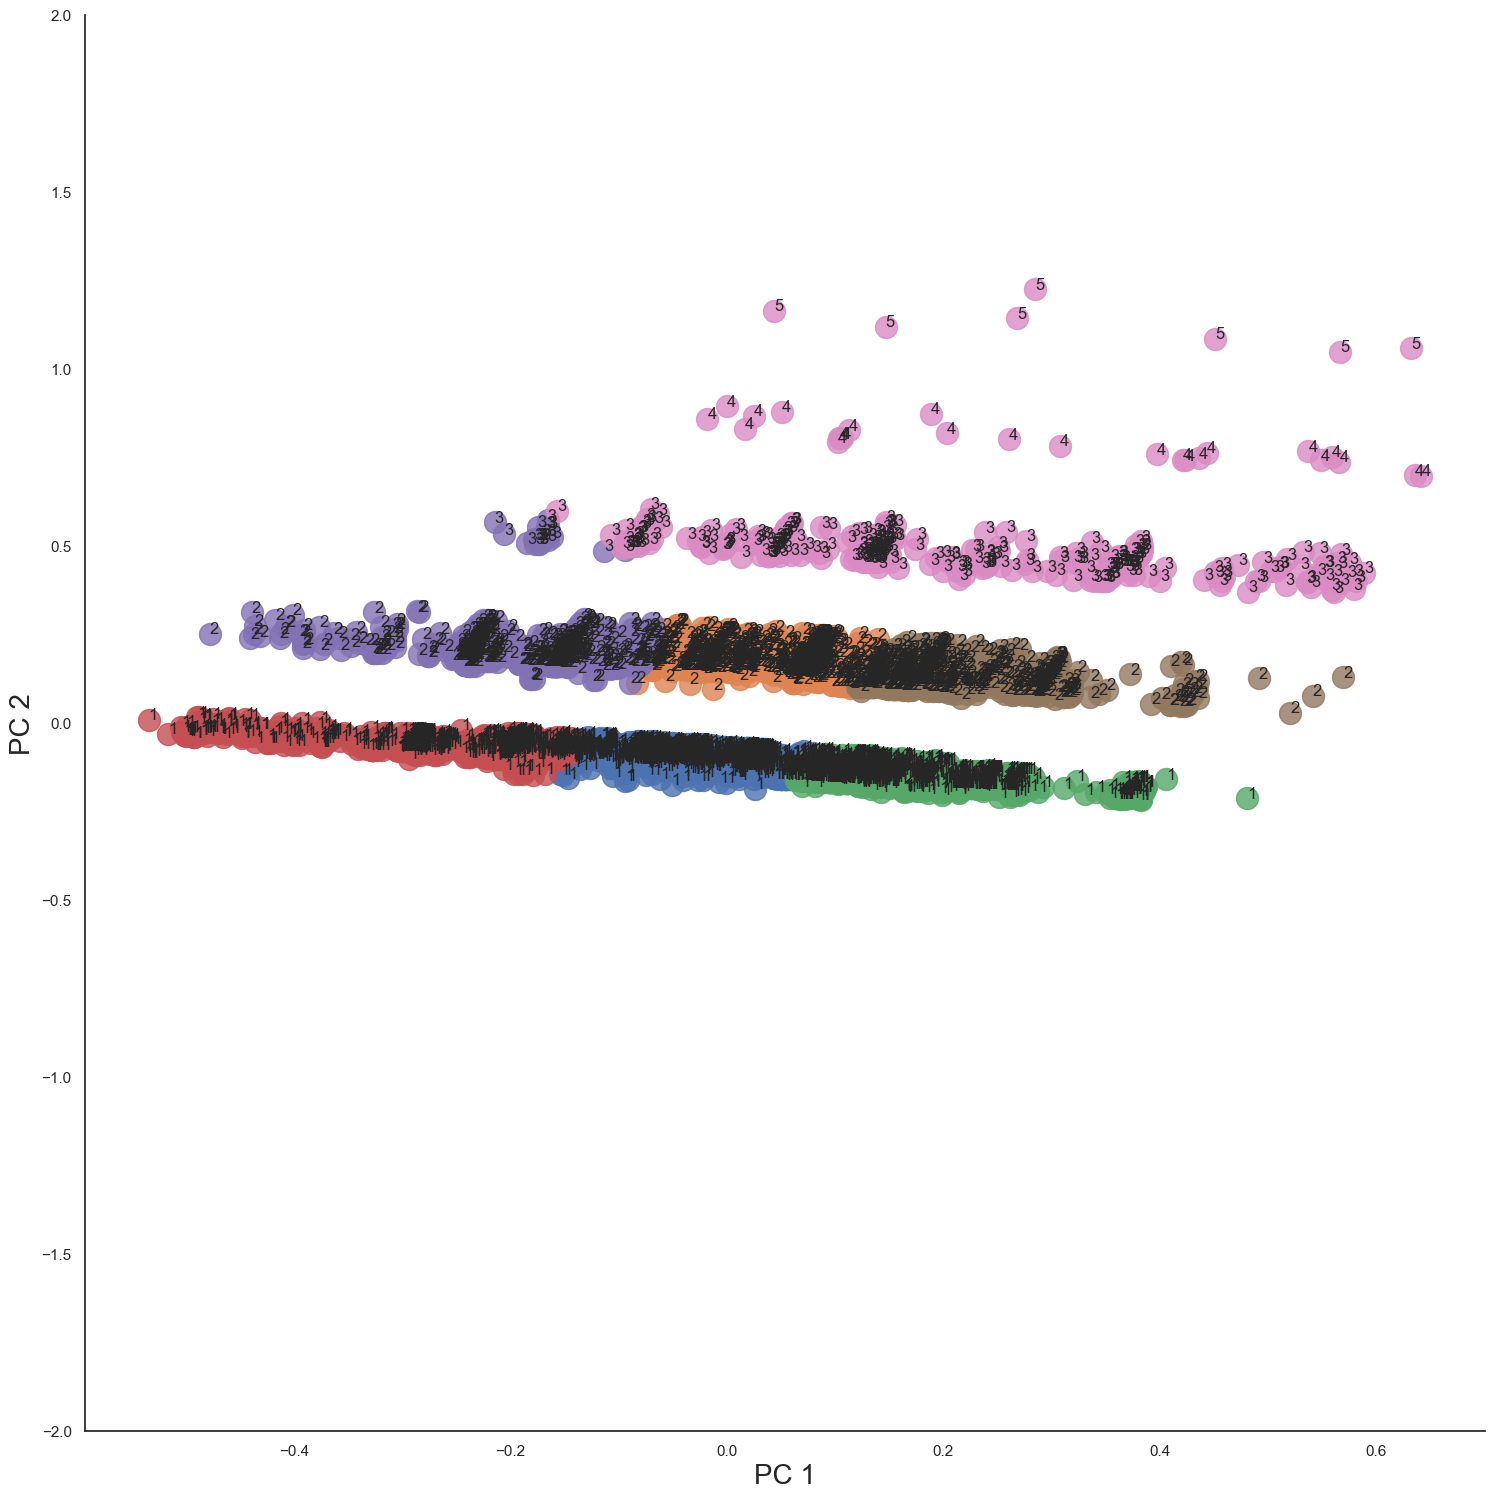

In [324]:
sns.set(style="white")
ax = sns.lmplot(x="A", y="B", hue='Cluster', data = reduced1, legend=False,
fit_reg=False, height = 15, scatter_kws={"s": 250})
texts = []
for x, y, s in zip(reduced1.A, reduced1.B, reduced1.Peligrosidad):
    texts.append(plt.text(x, y, s))
    ax.set(ylim=(-2, 2))
#plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 20)
plt.ylabel("PC 2", fontsize = 20)
plt.show()